In [1]:

import cv2
import numpy as np
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plantcv.learn import train_kmeans
from plantcv.plantcv.analyze import color as analyze_color
from plantcv.plantcv.visualize import obj_sizes


In [5]:
# Set input variables
args = WorkflowInputs(images=[r"R:\01-Organize\01-Management\01-Data Center\Brisk\06-AI & Machine Learning (D0340)\04-IOT_Smartfarm\picture_original_topview_smartfarm\picture_topview_03102025_143739.jpg"],
                      names="image",
                      result="plantcv_results.csv",
                      debug="plot")

# Set variables
pcv.params.debug = args.debug
pcv.params.dpi = 100
pcv.params.text_size = 0.5
pcv.params.text_thickness = 3

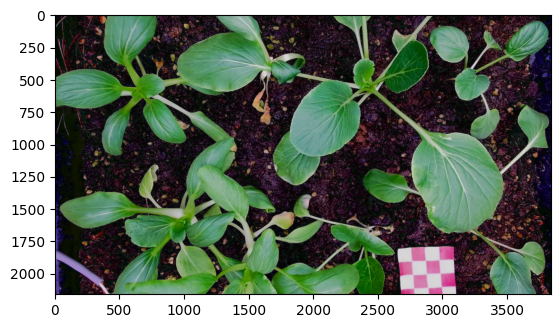

In [6]:
img, imgpath, imgname = pcv.readimage(filename=args.image)

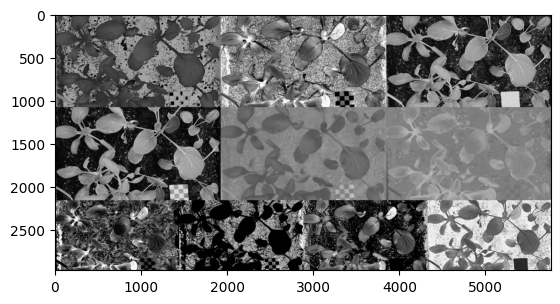

In [7]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

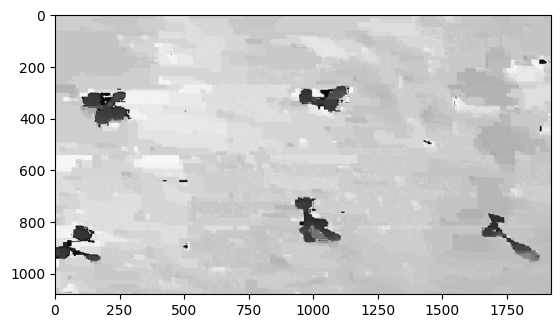

In [5]:
h = pcv.rgb2gray_hsv(rgb_img=img, channel='h')

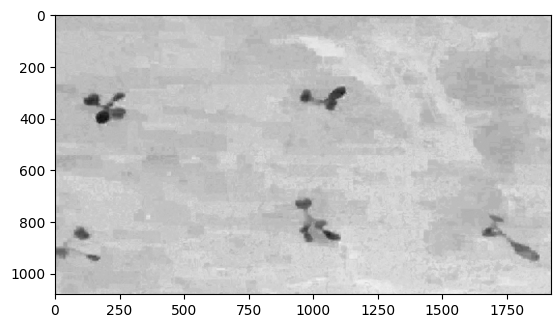

In [6]:
a = pcv.rgb2gray_lab(rgb_img=img, channel='a')

In [22]:
hist_a = pcv.visualize.histogram(img=h, bins=25)

alt.Chart(...)

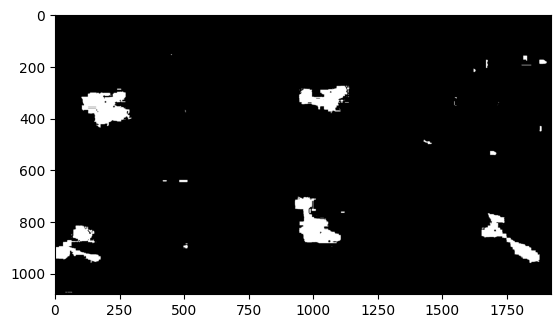

In [23]:
h_thresh = pcv.threshold.binary(gray_img=h, threshold=120, object_type='dark')

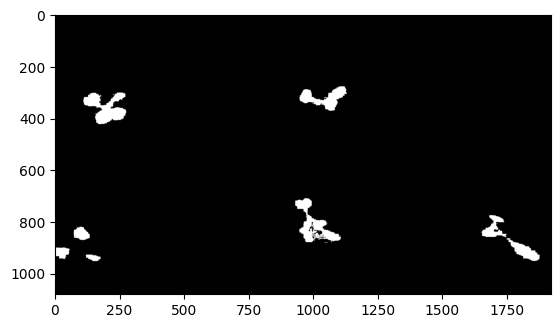

In [21]:
a_thresh = pcv.threshold.binary(gray_img=a, threshold=125, object_type='dark')

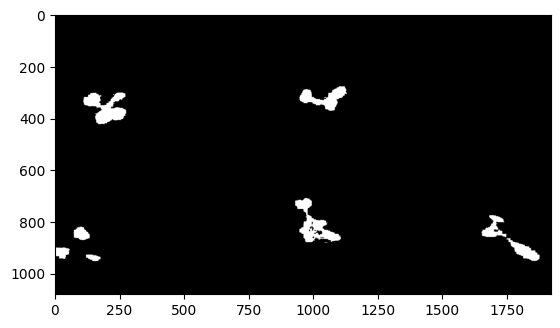

In [9]:
closed = pcv.closing(gray_img=a_thresh, kernel=np.array([[1,0,1], [0,1,0], [1,0,1]]))

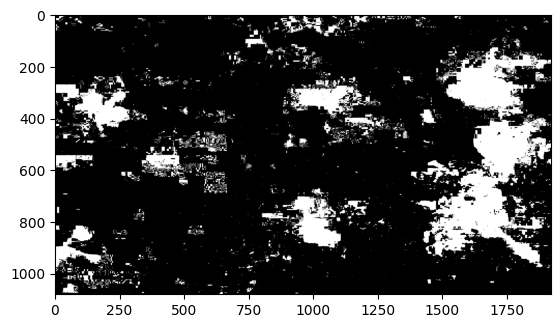

In [10]:
gaus = pcv.threshold.gaussian(gray_img=a, ksize=5000, offset=3,
                              object_type='dark')

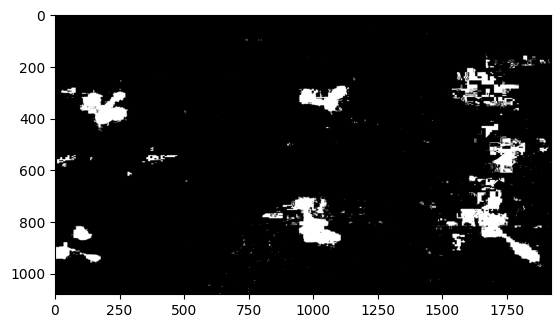

In [11]:
threshold_mean = pcv.threshold.mean(gray_img=a, ksize=1501, offset=5,
                                    object_type='dark')

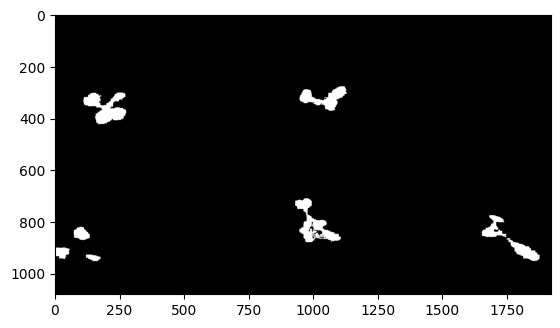

In [12]:
a_fill = pcv.fill(bin_img=a_thresh, size=150)

There were 148 objects not annotated.


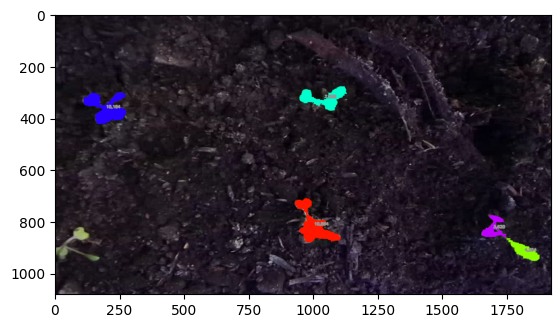

In [13]:
plotting_img = pcv.visualize.obj_sizes(img=img, mask=a_thresh, num_objects=5)

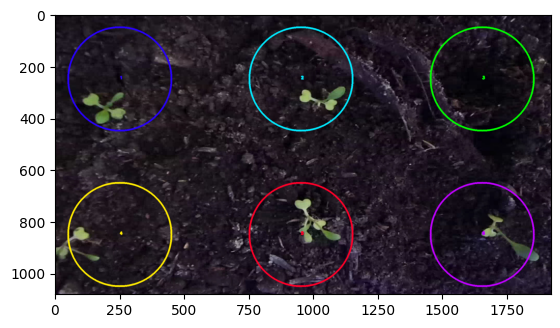

In [14]:
rois1 = pcv.roi.multi(img=img, coord=(250,250), radius=200,
                      spacing=(700,600), nrows=2, ncols=3)

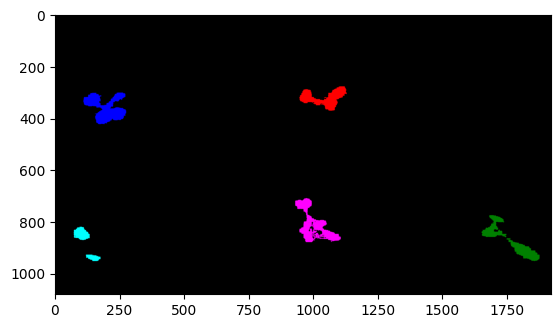

In [15]:
lbl_mask, n_lbls = pcv.create_labels(mask=a_fill, rois=rois1)

In [16]:
print(np.unique(lbl_mask))  
# Output: array([0, 1, 2, 3])
print(n_lbls)  
# Output: 3


[0 1 2 4 5 6]
6


In [17]:
pcv.print_image(lbl_mask, "mask_filled.png")

In [18]:
analyze_color(rgb_img=img, labeled_mask=lbl_mask, n_labels=n_lbls, colorspaces='all')

alt.FacetChart(...)

alt.FacetChart(...)

In [19]:
pcv.outputs.save_results(filename="test_output.json") 

results_dict = pcv.outputs.observations
print(results_dict)

{'default_1': {'blue_frequencies': {'trait': 'blue frequencies', 'method': 'plantcv.plantcv.analyze.color', 'scale': 'frequency', 'datatype': "<class 'list'>", 'value': [0.4260153365521159, 0.06626905235255136, 0.1136040897472309, 0.09467007478935908, 0.1420051121840386, 0.17040613462084636, 0.27454321688914135, 0.17987314209978225, 0.18934014957871817, 0.27454321688914135, 0.2556092019312695, 0.2177411720155259, 0.3408122692416927, 0.40708132159424404, 0.3408122692416927, 0.4544163589889236, 0.37868029915743634, 0.3597462841995645, 0.4354823440310518, 0.5680204487361544, 0.520685411341475, 0.6342895010887059, 0.5490864337782827, 0.5017513963836031, 0.5490864337782827, 0.5680204487361544, 0.6437565085676418, 0.6816245384833854, 0.6248224936097699, 0.719492568399129, 0.7857616207516803, 0.7289595758780649, 0.6626905235255135, 0.6816245384833854, 0.8993657104989113, 0.6532235160465777, 0.5301524188204109, 0.615355486130834, 0.7762946132727445, 1.1076398750355012, 0.7952286282306162, 1.07